## Table of Contents
    01. Importing Libraries and Data
    02. Check our data
    03. Elbow technique
    04. K-Means clustering

## Importing Libraries and Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# This option ensures the graphs created appear after the code is executed
%matplotlib inline

In [4]:
#Importing Data
path = r'C:\Users\javir\Downloads\Javis Data Analytics stuff\Achievement 6\LoL Regional Project'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'combined.csv'))

## 02. Check our data

In [6]:
# Checking rows and columns
df.shape

(400000, 42)

In [7]:
# Checkig for missing values
df.isnull().sum()

server               0
season_id            0
match_id             0
game_created         0
game_duration        0
team                 0
map_side             0
win                  0
outcome              0
wards_placed         0
first_blood          0
first_tower          0
first_inhibitor      0
first_dragon         0
first_rift_herald    0
first_baron          0
team_kills           0
tower_kills          0
inhibitor_kills      0
dragon_kills         0
rift_herald_kills    0
baron_kills          0
ban1                 0
ban2                 0
ban3                 0
ban4                 0
ban5                 0
pick1                0
pick2                0
pick3                0
pick4                0
pick5                0
player1_kills        0
player2_kills        0
player3_kills        0
player4_kills        0
player5_kills        0
solo_kills           0
duo_kills            0
trio_kills           0
quad_kills           0
penta_kills          0
dtype: int64

In [8]:
# Checking for duplicates
df_dups = df.duplicated()

In [9]:
# Number of false duplicate rows matches total rows, therefore we have no duplicates
df_dups.value_counts()

False    400000
dtype: int64

In [10]:
# Checking column names
df.columns

Index(['server', 'season_id', 'match_id', 'game_created', 'game_duration',
       'team', 'map_side', 'win', 'outcome', 'wards_placed', 'first_blood',
       'first_tower', 'first_inhibitor', 'first_dragon', 'first_rift_herald',
       'first_baron', 'team_kills', 'tower_kills', 'inhibitor_kills',
       'dragon_kills', 'rift_herald_kills', 'baron_kills', 'ban1', 'ban2',
       'ban3', 'ban4', 'ban5', 'pick1', 'pick2', 'pick3', 'pick4', 'pick5',
       'player1_kills', 'player2_kills', 'player3_kills', 'player4_kills',
       'player5_kills', 'solo_kills', 'duo_kills', 'trio_kills', 'quad_kills',
       'penta_kills'],
      dtype='object')

In [11]:
# Creating a new column, adding all the objectives together
df['total_objective_score'] = df['first_blood'] + df['first_tower'] + df['first_inhibitor'] + df['first_dragon'] + df['first_baron'] + df['tower_kills'] + df['inhibitor_kills'] + df['dragon_kills'] + df['first_rift_herald'] + df['baron_kills']

In [12]:
# Creating a new column, adding all the team work kills together
df['teamwork_kills'] = df['duo_kills'] + df['trio_kills'] + df['quad_kills'] + df['penta_kills']

In [13]:
# Checking our data types
df.dtypes

server                   object
season_id                 int64
match_id                  int64
game_created             object
game_duration             int64
team                      int64
map_side                 object
win                       int64
outcome                  object
wards_placed              int64
first_blood               int64
first_tower               int64
first_inhibitor           int64
first_dragon              int64
first_rift_herald         int64
first_baron               int64
team_kills                int64
tower_kills               int64
inhibitor_kills           int64
dragon_kills              int64
rift_herald_kills         int64
baron_kills               int64
ban1                     object
ban2                     object
ban3                     object
ban4                     object
ban5                     object
pick1                    object
pick2                    object
pick3                    object
pick4                    object
pick5   

In [14]:
# Creating a random sample our data, as plotting 400,000 dots can be difficult to read, we are looking at 20% of our data
df_samp = df.sample(n = 80000, random_state = 1)

In [15]:
# creating a new data frame with only int64 type columns
df_int = df_samp[['season_id',
'match_id',
'game_duration',
'team',
'win',
'wards_placed',
'total_objective_score',
'first_blood',
'first_tower',
'first_inhibitor',
'first_dragon',
'first_rift_herald',
'first_baron',
'team_kills',
'tower_kills',
'inhibitor_kills',
'dragon_kills',
'rift_herald_kills',
'baron_kills',
'player1_kills',
'player2_kills',
'player3_kills',
'player4_kills',
'player5_kills',
'solo_kills',
'teamwork_kills',
'duo_kills',
'trio_kills',
'quad_kills',
'penta_kills']]

## 03. Elbow technique

In [16]:
# Define the rannge of potential clusters in our data
num_cl = range(1,10)

In [17]:
# Defining the k-means clusters by the range we set
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [18]:
# Creating an object that represents the rate of variation in our given clusters
score = [kmeans[i].fit(df_int).score(df_int) for i in range(len(kmeans))]

In [19]:
# Checking score
score

[-8.94743079123122e+22,
 -1.8603254474929231e+22,
 -4.67172070403483e+21,
 -2.729895642981462e+21,
 -1.0453961129956246e+21,
 -1.511242389424844e+20,
 -3.5880719011346833e+19,
 -2.999706647131664e+19,
 -2.5699984609574932e+19]

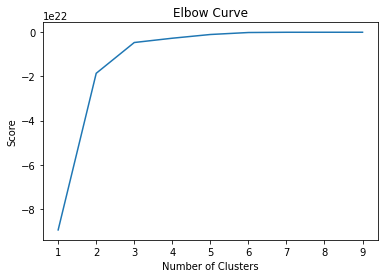

In [20]:
# Plotting the data using Pylab, using 'num_cl' as x and 'score' as y
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on our elbow curve, our optimal cluster group would be between 2-3, I will be selecting 3 as the curve straightens right after it.

## 04. K-Means clustering

In [21]:
# Creating k-means object
kmeans = KMeans(n_clusters = 3, n_jobs = -1)

In [22]:
# Fitting the k-means to our dataframe
kmeans.fit(df_int)

C:\Users\javir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [23]:
# Creating new column adding the clusters we set
df_int['clusters'] = kmeans.fit_predict(df_int)

C:\Users\javir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\javir\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [24]:
# Checking new data frame
df_int.head()

,season_id,match_id,game_duration,team,win,wards_placed,total_objective_score,first_blood,first_tower,first_inhibitor,first_dragon,first_rift_herald,first_baron,team_kills,tower_kills,inhibitor_kills,dragon_kills,rift_herald_kills,baron_kills,player1_kills,player2_kills,player3_kills,player4_kills,player5_kills,solo_kills,teamwork_kills,duo_kills,trio_kills,quad_kills,penta_kills,clusters
164217,11,606009155,1865,0,1,91,15,1,0,1,1,0,0,49,8,2,2,0,0,10,9,22,1,7,11,31,6,13,9,3,1
136326,11,3323683475,1424,1,1,33,12,1,1,1,0,1,0,29,7,1,0,1,0,0,3,15,4,7,2,28,7,14,5,2,0
139035,11,3360920296,2066,0,1,97,14,0,1,0,1,1,1,40,6,0,2,1,2,7,8,12,3,10,3,38,18,14,4,2,0
184089,11,580795683,2113,0,0,44,7,1,0,0,1,0,0,29,2,0,3,0,0,7,4,13,5,0,7,16,8,4,2,2,1
49577,11,2041338336,1227,0,0,39,0,0,0,0,0,0,0,14,0,0,0,0,0,2,1,3,4,4,4,12,5,4,3,0,2


In [25]:
# Checking cluster counts
df_int['clusters'].value_counts()

1    40005
2    23955
0    16040
Name: clusters, dtype: int64

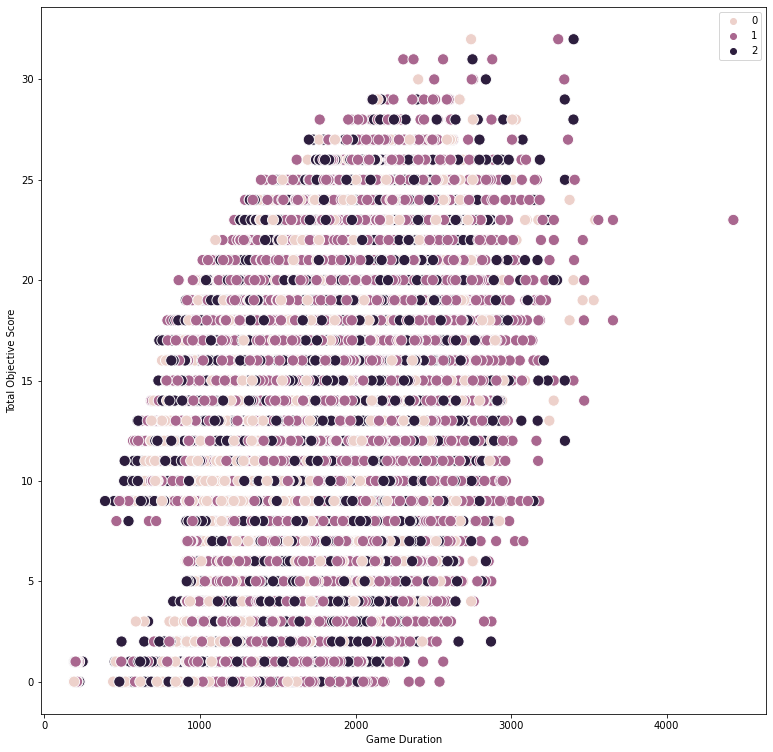

In [26]:
# Plotting clusters for variables 'game_duration' and 'total_objective_score'
plt.figure(figsize = (13,13))
ax = sns.scatterplot(x = df_int['game_duration'], y = df_int['total_objective_score'], hue = kmeans.labels_, s=125)

ax.grid(False)
plt.xlabel('Game Duration')
plt.ylabel('Total Objective Score')
plt.show()

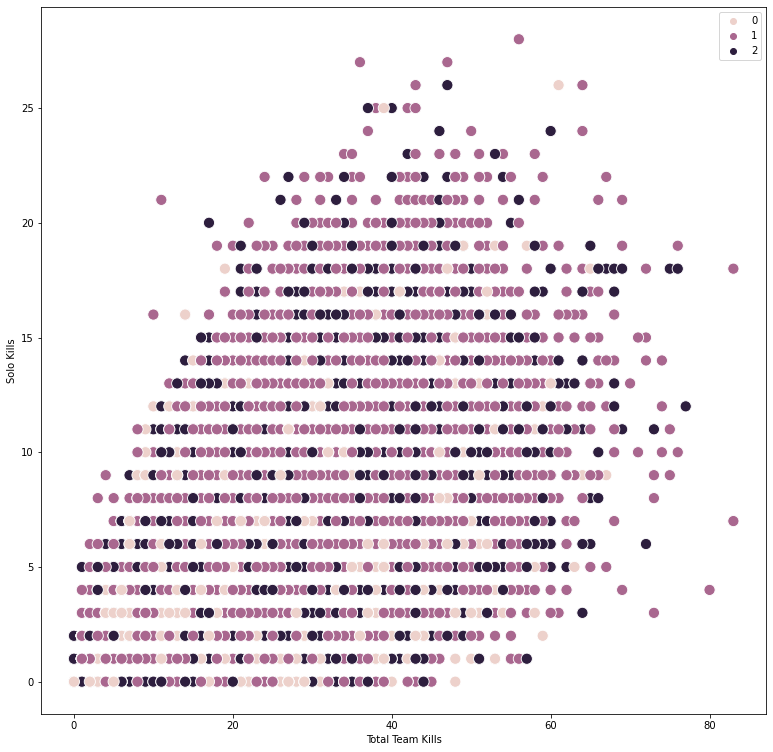

In [27]:
# Plotting clusters for variables 'team_kills' and 'solo_kills'
plt.figure(figsize = (13,13))
ax = sns.scatterplot(x = df_int['team_kills'], y = df_int['solo_kills'], hue = kmeans.labels_, s=125)

ax.grid(False)
plt.xlabel('Total Team Kills')
plt.ylabel('Solo Kills')
plt.show()

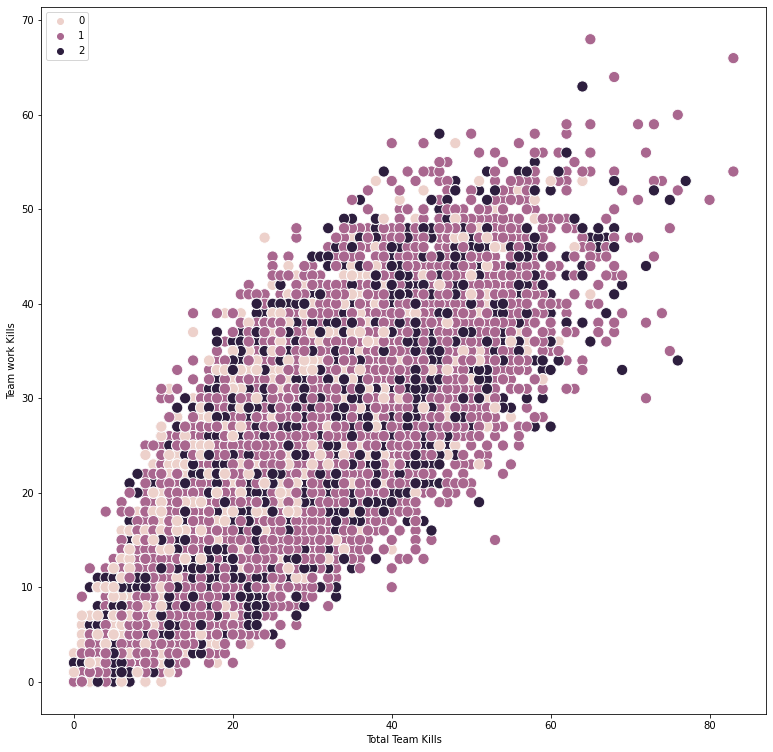

In [28]:
# Plotting clusters for variables 'team_kills' and 'teamwork_kills'
plt.figure(figsize = (13,13))
ax = sns.scatterplot(x = df_int['team_kills'], y = df_int['teamwork_kills'], hue = kmeans.labels_, s=125)

ax.grid(False)
plt.xlabel('Total Team Kills')
plt.ylabel('Team work Kills')
plt.show()

Clusters are usefull for finding potential groups of data with similarites in values thus grouping it for potential analysis. Clustering is also useful for checking for similarites or if your data is just random. Looking at our charts made, our clusters points are simingly placed randomly with no easy analysis on them

In [30]:
df_int.loc[df_int['clusters'] == 2, 'cluster'] = 'dark purple'
df_int.loc[df_int['clusters'] == 1, 'cluster'] = 'purple'
df_int.loc[df_int['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\javir\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\javir\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
df_int.groupby('cluster').agg({'game_duration' : ['mean', 'median'],
                               'wards_placed' : ['mean', 'median'],
                               'total_objective_score' : ['mean', 'median'],
                               'team_kills' : ['mean', 'median'],
                               'solo_kills' : ['mean', 'median'],
                               'teamwork_kills' : ['mean', 'median'],
                              })

game_duration         wards_placed        total_objective_score  \
                     mean  median         mean median                  mean   
cluster                                                                       
dark purple   1605.085076  1609.0    55.118389   49.0             10.524734   
pink          1530.751683  1524.0    58.152244   52.0              9.753741   
purple        1644.206324  1651.0    55.547457   50.0             10.690089   

                   team_kills        solo_kills        teamwork_kills         
            median       mean median       mean median           mean median  
cluster                                                                       
dark purple   11.0  23.668754   23.0   5.384888    5.0      20.837529   21.0  
pink           9.0  21.346945   21.0   4.137843    4.0      19.579613   19.0  
purple        11.0  24.318835   24.0   5.590101    5.0      21.384227   22.0

As we can see from the results cluster 'pink' has the lowest values of all categories, except, wards_placed where 'pink' is the highest. 'Purple' and 'Dark Purple' have similar value counts with 'Purple' being higher in values, although not by much. These findings still help with our potential analysis although maybe not immediately noticable, all results are always beneficial to analysts as it allows us to learn from the information gained.